In [ ]:
!pip install dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import dash
from dash import html, dcc
import plotly.express as px
from dash.dependencies import Input, Output

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PBP2324.csv')

In [ ]:
df.head()

,game_id,date,home,away,play_id,half,time_remaining_half,secs_remaining,secs_remaining_absolute,description,...,arena_location,arena,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after
0,401604781,2023-11-07,Texas A&M-CC,SW Adventist,1,1,19:38,2378,2378,Jason Garcia missed Layup.,...,"Corpus Christi, TX",Dugan Wellness Center,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC
1,401604781,2023-11-07,Texas A&M-CC,SW Adventist,2,1,19:35,2375,2375,Garry Clark Defensive Rebound.,...,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
2,401604781,2023-11-07,Texas A&M-CC,SW Adventist,3,1,19:24,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,...,"Corpus Christi, TX",Dugan Wellness Center,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist
3,401604781,2023-11-07,Texas A&M-CC,SW Adventist,4,1,18:59,2339,2339,Ephraim Viadex Turnover.,...,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC
4,401604781,2023-11-07,Texas A&M-CC,SW Adventist,5,1,18:59,2339,2339,Garry Clark Steal.,...,"Corpus Christi, TX",Dugan Wellness Center,1400,NaN,NaN,NaN,NaN,NaN,SW Adventist,Texas A&M-CC


#EDA

**game_id:** A unique integer identifier for each game, used to distinguish between different games.

**date:** The date the game was played, formatted as a string.

**home:** The home team's name, indicating which team is hosting the game.

**away:** The away team's name, indicating the visiting team.

**play_id:** A unique integer identifier for each individual play within a game.

**half:** An integer indicating which half of the game the play occurred in (1 or 2).

**time_remaining_half:** A string showing the time remaining in the current half when the play happened.

**secs_remaining:** An integer of the total seconds remaining in the half at the time of the play.

**secs_remaining_absolute:** An integer of the total seconds remaining in the game at the time of the play.

**description:** A text description of what happened during the play.

**action_team:** The team that is the focus of the action during the play.

**home_score:** An integer representing the current score of the home team at the time of the play.

**away_score:** An integer representing the current score of the away team at the time of the play.

**score_diff:** An integer representing the score differential (home score minus away score) at the time of the play.

**play_length:** An integer indicating the duration of the play in seconds.
scoring_play: A boolean indicating whether the play resulted in points being scored.

**foul:** A boolean indicating whether a foul occurred during the play.

**win_prob:** A float representing the calculated probability of the home team winning at the point of the play.

**naive_win_prob:** A float representing a basic model's calculated win probability for the home team without complex analytics.

**home_time_out_remaining:** An integer indicating how many timeouts the home team has left at the time of the play.

**away_time_out_remaining:** An integer indicating how many timeouts the away team has left at the time of the play.

**home_favored_by:** A float indicating how many points the home team is favored to win by, according to betting markets.

**total_line:** A float indicating the total points line set by bookmakers for the game.

**referees:** A string listing the referees officiating the game.

**arena_location:** The location of the arena where the game is played.

**arena:** The name of the arena where the game is played.

**attendance:** An integer indicating the number of people who attended the game.

**shot_team:** The team that took the shot (if the play was a shot).

**shot_outcome:** The outcome of the shot ("made" or "missed").

**shooter:** The player who took the shot.

**three_pt:** Indicates whether the shot was a three-pointer. Could be a boolean or a categorical string depending on how the data is structured.

**free_throw:** Indicates whether the shot was a free throw. Could be a boolean or a categorical string depending on how the data is structured.

**possession_before:** Which team had possession before the play started.

**possession_after:** Which team had possession after the play ended.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956323 entries, 0 to 1956322
Data columns (total 34 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   game_id                  int64  
 1   date                     object 
 2   home                     object 
 3   away                     object 
 4   play_id                  int64  
 5   half                     int64  
 6   time_remaining_half      object 
 7   secs_remaining           int64  
 8   secs_remaining_absolute  int64  
 9   description              object 
 10  action_team              object 
 11  home_score               int64  
 12  away_score               int64  
 13  score_diff               int64  
 14  play_length              int64  
 15  scoring_play             bool   
 16  foul                     bool   
 17  win_prob                 float64
 18  naive_win_prob           float64
 19  home_time_out_remaining  int64  
 20  away_time_out_remaining  int64  
 21  home_fav

In [ ]:
df.describe()

,game_id,play_id,half,secs_remaining,secs_remaining_absolute,home_score,away_score,score_diff,play_length,win_prob,naive_win_prob,home_time_out_remaining,away_time_out_remaining,home_favored_by,total_line,attendance
count,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956323e+06,1.956322e+06,1.956322e+06,1.956323e+06,1.956323e+06,1.717158e+06,1.657652e+06,1.956323e+06
mean,4.015922e+08,1.651011e+02,1.539102e+00,1.129371e+03,1.148419e+03,3.922574e+01,3.483634e+01,4.389395e+00,7.365059e+00,6.553228e-01,5.971732e-01,5.331178e+00,8.487970e-01,5.168178e+00,1.447207e+02,4.265429e+03
std,1.278912e+04,9.692093e+01,5.239613e-01,7.034508e+02,7.086607e+02,2.421028e+01,2.171198e+01,1.237912e+01,8.534883e+00,3.260927e-01,2.996327e-01,9.261172e-01,3.644939e+00,8.871813e+00,8.872422e+00,4.548823e+03
min,4.015734e+08,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.300000e+01,-2.880000e+02,0.000000e+00,0.000000e+00,1.000000e+00,-1.500000e+01,-2.450000e+01,1.075000e+02,0.000000e+00
25%,4.015816e+08,8.200000e+01,1.000000e+00,5.090000e+02,5.290000e+02,1.900000e+01,1.600000e+01,-3.000000e+00,0.000000e+00,4.042963e-01,3.943265e-01,5.000000e+00,-2.000000e+00,-1.500000e+00,1.385000e+02,1.114000e+03
50%,4.015938e+08,1.630000e+02,2.000000e+00,1.117000e+03,1.137000e+03,3.800000e+01,3.400000e+01,3.000000e+00,4.000000e+00,7.537733e-01,5.983908e-01,6.000000e+00,1.000000e+00,4.500000e+00,1.445000e+02,2.412000e+03
75%,4.016006e+08,2.450000e+02,2.000000e+00,1.733000e+03,1.752000e+03,5.800000e+01,5.100000e+01,1.000000e+01,1.300000e+01,9.561232e-01,8.755695e-01,6.000000e+00,4.000000e+00,1.050000e+01,1.505000e+02,6.000000e+03
max,4.016361e+08,5.420000e+02,5.000000e+00,2.400000e+03,3.297000e+03,1.460000e+02,1.240000e+02,9.600000e+01,6.000000e+02,1.000000e+00,1.000000e+00,9.000000e+00,6.000000e+00,5.950000e+01,1.775000e+02,2.519400e+04


In [ ]:
# Checking duplicated rows
print("\nNumber of Duplicated Rows:")
print(df.duplicated().sum())


Number of Duplicated Rows:
0


In [ ]:
na_counts = df.isna().sum()
print(na_counts)

game_id                          0
date                             0
home                             0
away                             0
play_id                          0
half                             0
time_remaining_half              0
secs_remaining                   0
secs_remaining_absolute          0
description                   1717
action_team                  65860
home_score                       0
away_score                       0
score_diff                       0
play_length                      0
scoring_play                     0
foul                             0
win_prob                         1
naive_win_prob                   1
home_time_out_remaining          0
away_time_out_remaining          0
home_favored_by             239165
total_line                  298671
referees                     49708
arena_location                   0
arena                            0
attendance                       0
shot_team                  1082158
shot_outcome        

In [ ]:
# Displaying the percentage of missing values
print("\nPercentage of Missing Values:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


Percentage of Missing Values:
description           0.087767
action_team           3.366520
win_prob              0.000051
naive_win_prob        0.000051
home_favored_by      12.225231
total_line           15.266957
referees              2.540889
shot_team            55.315917
shot_outcome         52.353625
shooter              52.353625
three_pt             52.353625
free_throw           52.353625
possession_before     6.244572
possession_after     11.320625
dtype: float64


Given our specific goal to identify which player should take the winning shot, removing entries with missing shooter data is likely the more feasible and scientifically sound approach. This ensures that our analysis for this particular question is based on complete and accurate data, directly linking player actions to game outcomes.

For broader analyses or exploratory data analysis, we might consider a segmented approach where we keep the "Unknown" data separate, allowing us to use it where the specific identity of the shooter isn't necessary. This dual approach allows for both detailed, specific analysis and broader, more general insights from the data.

In [ ]:
df_cleaned = df.dropna(subset=['shooter'])

In [ ]:
na_counts = df_cleaned.isna().sum()
print(na_counts)

game_id                         0
date                            0
home                            0
away                            0
play_id                         0
half                            0
time_remaining_half             0
secs_remaining                  0
secs_remaining_absolute         0
description                     0
action_team                     3
home_score                      0
away_score                      0
score_diff                      0
play_length                     0
scoring_play                    0
foul                            0
win_prob                        0
naive_win_prob                  0
home_time_out_remaining         0
away_time_out_remaining         0
home_favored_by            114017
total_line                 142416
referees                    23611
arena_location                  0
arena                           0
attendance                      0
shot_team                   57952
shot_outcome                    0
shooter       

**Removing unwanted columns**

In [ ]:
df_cleaned = df_cleaned.drop(columns=["referees", "arena", "arena_location", "date", "play_id", "total_line","home_favored_by","time_remaining_half"])

In [ ]:
df_cleaned.head()

,game_id,home,away,half,secs_remaining,secs_remaining_absolute,description,action_team,home_score,away_score,...,home_time_out_remaining,away_time_out_remaining,attendance,shot_team,shot_outcome,shooter,three_pt,free_throw,possession_before,possession_after
0,401604781,Texas A&M-CC,SW Adventist,1,2378,2378,Jason Garcia missed Layup.,away,0,0,...,6,6,1400,SW Adventist,missed,Jason Garcia,False,False,SW Adventist,Texas A&M-CC
2,401604781,Texas A&M-CC,SW Adventist,1,2364,2364,Jordan Roberts made Three Point Jumper. Assist...,home,3,0,...,6,6,1400,Texas A&M-CC,made,Jordan Roberts,True,False,Texas A&M-CC,SW Adventist
7,401604781,Texas A&M-CC,SW Adventist,1,2325,2325,Marcel Phifer missed Three Point Jumper.,away,3,0,...,6,6,1400,SW Adventist,missed,Marcel Phifer,True,False,SW Adventist,Texas A&M-CC
9,401604781,Texas A&M-CC,SW Adventist,1,2313,2313,Stephen Giwa missed Layup.,home,3,0,...,6,6,1400,Texas A&M-CC,missed,Stephen Giwa,False,False,Texas A&M-CC,Texas A&M-CC
11,401604781,Texas A&M-CC,SW Adventist,1,2310,2310,Garry Clark made Layup.,home,5,0,...,6,6,1400,Texas A&M-CC,made,Garry Clark,False,False,Texas A&M-CC,SW Adventist


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 932117 entries, 0 to 1956320
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   game_id                  932117 non-null  int64  
 1   home                     932117 non-null  object 
 2   away                     932117 non-null  object 
 3   half                     932117 non-null  int64  
 4   secs_remaining           932117 non-null  int64  
 5   secs_remaining_absolute  932117 non-null  int64  
 6   description              932117 non-null  object 
 7   action_team              932114 non-null  object 
 8   home_score               932117 non-null  int64  
 9   away_score               932117 non-null  int64  
 10  score_diff               932117 non-null  int64  
 11  play_length              932117 non-null  int64  
 12  scoring_play             932117 non-null  bool   
 13  foul                     932117 non-null  bool   
 14  win_prob

In [ ]:
na_counts = df_cleaned.isna().sum()
print(na_counts)


game_id                        0
home                           0
away                           0
half                           0
secs_remaining                 0
secs_remaining_absolute        0
description                    0
action_team                    3
home_score                     0
away_score                     0
score_diff                     0
play_length                    0
scoring_play                   0
foul                           0
win_prob                       0
naive_win_prob                 0
home_time_out_remaining        0
away_time_out_remaining        0
attendance                     0
shot_team                  57952
shot_outcome                   0
shooter                        0
three_pt                       0
free_throw                     0
possession_before          57952
possession_after           99000
dtype: int64


In [ ]:
df_cleaned.columns

Index(['game_id', 'home', 'away', 'half', 'secs_remaining',
       'secs_remaining_absolute', 'description', 'action_team', 'home_score',
       'away_score', 'score_diff', 'play_length', 'scoring_play', 'foul',
       'win_prob', 'naive_win_prob', 'home_time_out_remaining',
       'away_time_out_remaining', 'attendance', 'shot_team', 'shot_outcome',
       'shooter', 'three_pt', 'free_throw', 'possession_before',
       'possession_after'],
      dtype='object')

In [ ]:
df_cleaned.half.value_counts()

,count
half,
2,484975
1,438080
3,7677
4,1154
5,231


**In men's college basketball. There are only two halves. Each half is 20 minutes long and separated by halftime.**


In [ ]:
df_cleaned=df_cleaned[(df_cleaned.half==1) | (df_cleaned.half==2)]


In [ ]:
df_cleaned.home.value_counts()

,count
home,
Illinois,3770
Florida,3666
VCU,3559
Samford,3517
Kentucky,3513
...,...
Le Moyne,1307
Alcorn St,1125
Miss Valley St,932


In [ ]:
df_cleaned.columns

Index(['game_id', 'home', 'away', 'half', 'secs_remaining',
       'secs_remaining_absolute', 'description', 'action_team', 'home_score',
       'away_score', 'score_diff', 'play_length', 'scoring_play', 'foul',
       'win_prob', 'naive_win_prob', 'home_time_out_remaining',
       'away_time_out_remaining', 'attendance', 'shot_team', 'shot_outcome',
       'shooter', 'three_pt', 'free_throw', 'possession_before',
       'possession_after'],
      dtype='object')

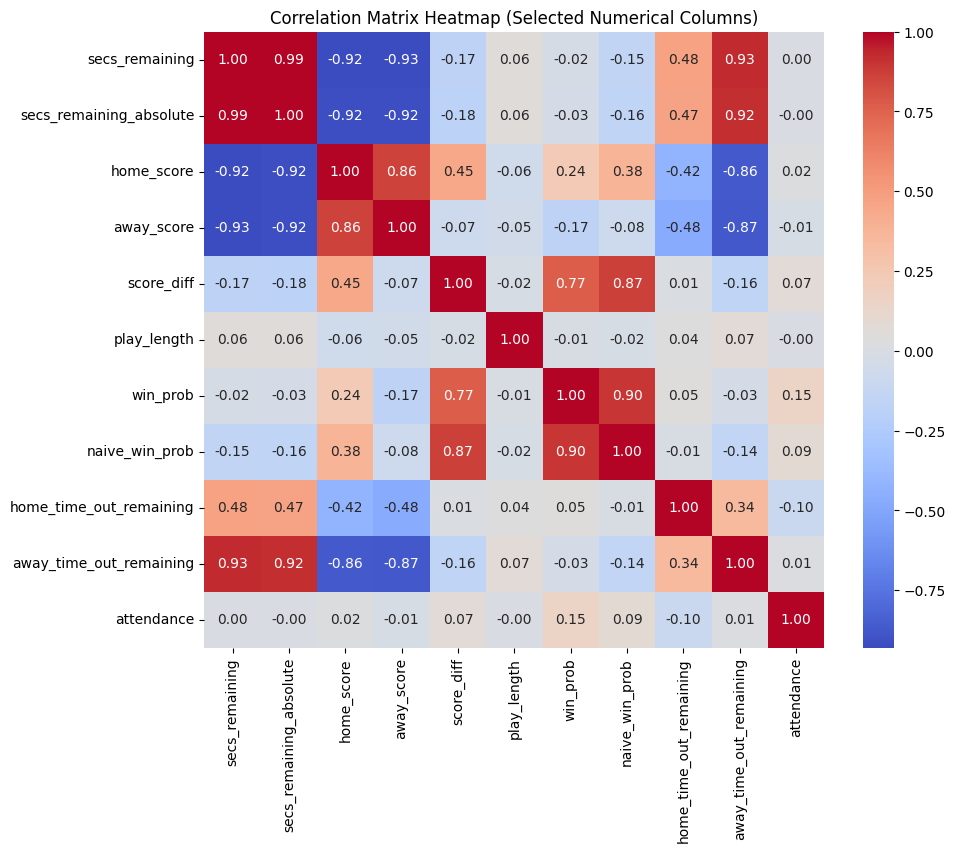

In [ ]:
# Selecting relevant numerical columns for correlation analysis
numerical_columns = [
    'secs_remaining', 'secs_remaining_absolute', 'home_score', 'away_score',
    'score_diff', 'play_length', 'win_prob', 'naive_win_prob',
    'home_time_out_remaining', 'away_time_out_remaining', 'attendance'
]

# Filtering the dataframe to include only these columns
df_numerical = df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = df_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap (Selected Numerical Columns)")
plt.show()

The heatmap visualizations display correlations among selected numerical columns, highlighting relationships such as the strong positive correlation between secs_remaining and secs_remaining_absolute, as well as notable correlations between win_prob, score_diff, and naive_win_prob, which suggest these features may collectively impact game outcomes.

## Feature Engineering

### Shooting Accuracy of Players

In [ ]:
import pandas as pd

# Calculate overall shooting percentage
df_cleaned['is_shot'] = df_cleaned['shot_outcome'].notna()  # Identify shot attempts
df_cleaned['is_made'] = (df_cleaned['shot_outcome'] == 'made')  # Identify made shots

# Overall Shooting Percentage
player_shooting = df_cleaned.groupby(['shot_team','shooter']).agg(
    total_shots=('is_shot', 'sum'),
    made_shots=('is_made', 'sum')
)
player_shooting['shooting_percentage'] = (player_shooting['made_shots'] / player_shooting['total_shots']) * 100
player_shooting.fillna(0, inplace=True)  # Replace NaNs with 0 for players who didn't shoot in clutch time
player_shooting=player_shooting[player_shooting['total_shots']>10]
player_shooting = player_shooting.sort_values(by=['shot_team','shooting_percentage'], ascending=False)
player_shooting

total_shots  made_shots  shooting_percentage
shot_team     shooter                                                       
Youngstown St Imanuel Zorgvol            44          30            68.181818
              Brandon Noel               15          10            66.666667
              Jimmy Salamone             11           7            63.636364
              Gabe Dynes                 61          38            62.295082
              Jalen Jackson              21          13            61.904762
...                                     ...         ...                  ...
AR-Pine Bluff Brandon Jackson            14           6            42.857143
              Jerry Boston               11           4            36.363636
ANTELOPE      Christian Taylor           17          10            58.823529
              Rodney Ray                 11           5            45.454545
              Michael Hayes              20           9            45.000000

[6095 rows x 3 columns]

## Clutch Performnance of the Players

In [ ]:
# Filter plays where secs_remaining is 120 seconds or less
clutch_plays = df_cleaned[df_cleaned['secs_remaining'] <= 120]

# Calculate clutch shooting percentage
clutch_shooting = clutch_plays.groupby(['shot_team','shooter']).agg(
    clutch_shots=('is_shot', 'sum'),
    clutch_made_shots=('is_made', 'sum')
)
clutch_shooting['clutch_shooting_percentage'] = (clutch_shooting['clutch_made_shots'] / clutch_shooting['clutch_shots']) * 100
clutch_shooting.fillna(0, inplace=True)  # Replace NaNs with 0 for players who didn't shoot in clutch time
clutch_shooting=clutch_shooting[clutch_shooting['clutch_shots']>10]
clutch_shooting = clutch_shooting.sort_values(by=['shot_team','clutch_shooting_percentage'], ascending=False)
clutch_shooting

clutch_shots  clutch_made_shots  \
shot_team      shooter                                               
Youngstown St  DJ Burns                      27                 20   
               Brett Thompson                32                 20   
               Bryson Langdon                18                 11   
               E.J. Farmer                   12                  7   
               Ziggy Reid                    14                  8   
...                                         ...                ...   
Abilene Chrstn Ali Abdou Dibba               17                  7   
AR-Pine Bluff  Lonnell Martin Jr.            17                 14   
               Rashad Williams               18                 14   
               Kylen Milton                  23                 17   
               Joe French                    21                 14   

                                   clutch_shooting_percentage  
shot_team      shooter                                         
Youngstown St  DJ Burns                             74.074074  
               Brett Thompson                       62.500000  
               Bryson Langdon                       61.111111  
               E.J. Farmer                          58.333333  
               Ziggy Reid                           57.142857  
...                                                       ...  
Abilene Chrstn Ali Abdou Dibba                      41.176471  
AR-Pine Bluff  Lonnell Martin Jr.                   82.352941  
               Rashad Williams                      77.777778  
               Kylen Milton                         73.913043  
               Joe French                           66.666667  

[1993 rows x 3 columns]

## Recent Player Performance

In [ ]:
import pandas as pd

# Assuming you have already created the clutch_plays DataFrame

# Set the window size for the last N shots to track recent performance (e.g., last 5 shots)
window_size = 5

# Sort clutch plays by game and the order of events (e.g., by time or play number)
clutch_plays = clutch_plays.sort_values(by=['game_id', 'secs_remaining'])

# Convert shot_outcome to numeric: 'made' -> 1, 'missed' -> 0
clutch_plays['shot_outcome_numeric'] = clutch_plays['shot_outcome'].apply(lambda x: 1 if x == 'made' else 0)

# Create a rolling window to track the outcomes of the last N shots for each player
clutch_plays['recent_shots'] = clutch_plays.groupby('shooter')['shot_outcome_numeric'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).apply(
        lambda y: (y == 1).sum(), raw=False  # Count how many of the last N shots were made
    )
)

# Create a 'momentum' feature based on the proportion of successful shots in the last window
clutch_plays['momentum'] = clutch_plays['recent_shots'] / window_size

# Normalize momentum to ensure it stays between 0 and 1 (if necessary)
# Momentum values will be capped at 1 (perfect shooting streak) and 0 (no successful shots)
clutch_plays['momentum'] = clutch_plays['momentum'].clip(0, 1)

# Fill any NaN values if they occur (e.g., if a player hasn't taken many shots)
clutch_plays['momentum'] = clutch_plays['momentum'].fillna(0)

# Display the updated DataFrame with the 'momentum' feature
clutch_plays[['game_id', 'shooter', 'secs_remaining', 'shot_outcome', 'recent_shots', 'momentum']].head(10)


,game_id,shooter,secs_remaining,shot_outcome,recent_shots,momentum
695202,401573353,Aanen Moody,19,made,1.0,0.2
695196,401573353,Casey Jones,34,missed,0.0,0.0
695193,401573353,Cedric Coward,36,missed,0.0,0.0
695191,401573353,Blake Jones,62,missed,0.0,0.0
695189,401573353,Casey Jones,70,made,1.0,0.2
695190,401573353,Casey Jones,70,made,2.0,0.4
695186,401573353,Aanen Moody,71,missed,1.0,0.2
695184,401573353,Josh Vazquez,78,missed,0.0,0.0
695182,401573353,Ellis Magnuson,83,made,1.0,0.2
695183,401573353,Ellis Magnuson,83,made,2.0,0.4


In [ ]:
# Filter free throw attempts
free_throws = df_cleaned[df_cleaned['free_throw'] == True]

# Calculate free throw shooting percentage
free_throw_shooting = free_throws.groupby('shooter').agg(
    free_throw_attempts=('free_throw', 'sum'),
    free_throw_made=('is_made', 'sum')
)
free_throw_shooting['free_throw_percentage'] = (free_throw_shooting['free_throw_made'] / free_throw_shooting['free_throw_attempts']) * 100
free_throw_shooting.fillna(0, inplace=True)  # Replace NaNs with 0 for players who didn't take free throws


In [ ]:
free_throw_shooting

,free_throw_attempts,free_throw_made,free_throw_percentage
shooter,,,
,5,2,40.0
A'lahn Sumler,79,57,72.151899
A.J. Hoggard,106,84,79.245283
A.J. Lopez,52,42,80.769231
A.J. Neal,29,20,68.965517
...,...,...,...
Zvonimir Ivisic,20,16,80.0
Zy'Nyia White,4,4,100.0
Zyeir Lawrence,3,2,66.666667


In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Initialize the Dash application
app = dash.Dash(__name__)

# Assuming df_cleaned and clutch_plays are your DataFrames, make sure both are loaded and available.
# Your clutch_plays DataFrame should already have the 'momentum' feature calculated.

# Prepare the options for the dropdown from 'shot_team', ensuring no NaN values and only unique values
options = [{'label': i, 'value': i} for i in df_cleaned['shot_team'].dropna().unique()]

# Define the layout of the application
app.layout = html.Div([
    html.H1("Player Performance and Clutch Dashboard"),
    dcc.Dropdown(
        id='team-selector',
        options=options,
        value='All Teams'  # Set 'All Teams' or the first team as the default
    ),
    dcc.Graph(id='shooting-performance'),
    dcc.Graph(id='win-prob-impact'),
    html.H2("Clutch Performance Analysis"),
    dcc.Graph(id='clutch-shooting-performance'),
    html.H2("Recent Player Performance"),
    dcc.Graph(id='recent-performance')  # New graph for recent performance
])

# Callback to update the graphs based on team selection
@app.callback(
    [
        Output('shooting-performance', 'figure'),
        Output('win-prob-impact', 'figure'),
        Output('clutch-shooting-performance', 'figure'),
        Output('recent-performance', 'figure')  # Output for the new graph
    ],
    [Input('team-selector', 'value')]
)
def update_graphs(selected_team):
    if selected_team and selected_team != 'All Teams':
        df_filtered = df_cleaned[df_cleaned['shot_team'] == selected_team]
        clutch_filtered = clutch_plays[clutch_plays['shot_team'] == selected_team]
    else:
        df_filtered = df_cleaned
        clutch_filtered = clutch_plays

    # General Shooting Performance Graph
    fig_shooting = px.bar(
        df_filtered,
        x='shooter',
        y='is_made',
        color='three_pt',
        title="Shooting Performance by Player",
        labels={"is_made": "Shots Made"}
    )

    # Win Probability Impact Graph
    if 'win_prob_change' not in df_filtered.columns:
        df_filtered['win_prob_change'] = df_filtered['win_prob'].diff().shift(-1)
    win_prob_change = df_filtered.groupby('shooter')['win_prob_change'].mean().reset_index()
    fig_win_prob = px.bar(
        win_prob_change,
        x='shooter',
        y='win_prob_change',
        title="Average Win Probability Change by Player",
        labels={"win_prob_change": "Win Probability Change"}
    )

    # Clutch Performance Graph
    clutch_time = 120
    df_clutch = df_filtered[df_filtered['secs_remaining'] <= clutch_time]
    fig_clutch_shooting = px.bar(
        df_clutch,
        x='shooter',
        y='is_made',
        title="Clutch Shooting Performance",
        labels={"is_made": "Clutch Shots Made"}
    )

    # Recent Player Performance Graph (Momentum)
    recent_performance = clutch_filtered.groupby('shooter')['momentum'].mean().reset_index()
    fig_recent_performance = px.bar(
        recent_performance,
        x='shooter',
        y='momentum',
        title="Recent Player Performance (Momentum)",
        labels={"momentum": "Momentum (Last 5 Shots)"}
    )

    return fig_shooting, fig_win_prob, fig_clutch_shooting, fig_recent_performance

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Calculate the change in win probability after each shot
df_cleaned['win_prob_change'] = df_cleaned['win_prob'].diff().shift(-1)
df_cleaned['naive_win_prob_change'] = df_cleaned['naive_win_prob'].diff().shift(-1)

# Filter only the rows where a shot was taken
shots_df = df_cleaned[df_cleaned['is_shot'] == True]

# Group by shooter and calculate the average win probability change contributed by each player's shots
win_prob_impact = shots_df.groupby('shooter').agg(
    avg_win_prob_change=('win_prob_change', 'mean'),
    avg_naive_win_prob_change=('naive_win_prob_change', 'mean')
).reset_index()


In [ ]:
win_prob_impact

,shooter,avg_win_prob_change,avg_naive_win_prob_change
0,,-0.034833,-0.068030
1,A'lahn Sumler,0.002611,-0.000624
2,A.J. Hoggard,0.000180,-0.001999
3,A.J. Lopez,-0.000870,0.002207
4,A.J. Neal,-0.008317,-0.013116
...,...,...,...
9205,Zvonimir Ivisic,0.010789,0.008149
9206,Zy'Nyia White,0.002138,0.001895
9207,Zyeir Lawrence,0.007205,0.007205
9208,Zyon Pullin,0.000401,-0.001483


In [ ]:
# Calculate the number of scoring plays for each player
scoring_plays = df_cleaned[df_cleaned['scoring_play'] == True]

# Analyze scoring in clutch situations (last 120 seconds)
clutch_scoring_plays = scoring_plays[scoring_plays['secs_remaining'] <= 120]

# Group by shooter to find total and clutch scoring frequency
scoring_stats = scoring_plays.groupby('shooter').size().reset_index(name='total_scoring_plays')
clutch_scoring_stats = clutch_scoring_plays.groupby('shooter').size().reset_index(name='clutch_scoring_plays')

# Merge the total scoring and clutch scoring stats
total_scoring_analysis = pd.merge(scoring_stats, clutch_scoring_stats, on='shooter', how='left').fillna(0)


In [ ]:
total_scoring_analysis

,shooter,total_scoring_plays,clutch_scoring_plays
0,,4,0.0
1,A'lahn Sumler,206,20.0
2,A.J. Hoggard,212,25.0
3,A.J. Lopez,117,8.0
4,A.J. Neal,63,12.0
...,...,...,...
8197,Zvonimir Ivisic,45,2.0
8198,Zy'Nyia White,5,0.0
8199,Zyeir Lawrence,2,0.0
8200,Zyon Pullin,287,39.0


In [ ]:
# Assume a foul drawn if there's a free throw attempt following a play
# Note: This is a simplification and may need adjustment based on actual play-by-play logs
df_cleaned['foul_drawn'] = df_cleaned['free_throw'].shift(-1) == True

# Filter for plays that resulted in a free throw (indicating a foul was likely drawn)
foul_drawn_df = df_cleaned[df_cleaned['foul_drawn'] == True]

# Group by the shooter to calculate foul drawing frequency
foul_drawing_stats = foul_drawn_df.groupby('shooter').size().reset_index(name='fouls_drawn')


In [ ]:
foul_drawing_stats

,shooter,fouls_drawn
0,,6
1,A'lahn Sumler,100
2,A.J. Hoggard,104
3,A.J. Lopez,47
4,A.J. Neal,39
...,...,...
7471,Zvonimir Ivisic,21
7472,Zy'Nyia White,3
7473,Zyeir Lawrence,3
7474,Zyon Pullin,145


In [ ]:
common_values = set(df_cleaned.home.drop_duplicates()).intersection(set(df_cleaned.away.drop_duplicates()))
len(common_values)

363

In [ ]:
df_cleaned.away.drop_duplicates()

,away
0,SW Adventist
356,Texas A&M-CC
744,Dall Christian
1822,Long Island
2529,UT Rio Grande
...,...
1949884,Car Christian
1951489,Rockford
1953403,Arlington Bpt
1954435,Tiffin


In [ ]:
all_teams = pd.concat([df_cleaned['home'], df_cleaned['away']]).drop_duplicates().reset_index(drop=True)

print(all_teams)

0       Texas A&M-CC
1            Houston
2         Texas Tech
3         N Kentucky
4               UTEP
           ...      
701    Car Christian
702         Rockford
703    Arlington Bpt
704           Tiffin
705         Hartford
Length: 706, dtype: object


In [ ]:
df_cleaned.shot_outcome

,shot_outcome
0,missed
2,made
7,missed
9,missed
11,made
...,...
1956311,missed
1956314,missed
1956316,made
1956317,made


In [ ]:
df_cleaned.isna().sum()

,0
game_id,0
home,0
away,0
half,0
secs_remaining,0
secs_remaining_absolute,0
description,0
action_team,3
home_score,0
away_score,0


### Handling nulls

In [ ]:
df_cleaned = df_cleaned.dropna(subset=['shot_team'])


if the possession_after is missing for some plays, it is safe to assume that the team will retain possession for subsequent plays unless something explicitly changes that.

In [ ]:
df_cleaned['possession_after'] = df_cleaned['possession_after'].ffill()


<ipython-input-41-6ca00b594922>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_cleaned.isna().sum()

,0
game_id,0
home,0
away,0
half,0
secs_remaining,0
secs_remaining_absolute,0
description,0
action_team,0
home_score,0
away_score,0


# Modeling

In [ ]:
# Aggregate player stats and include the 'shot_team' column in the aggregation
player_stats = df_cleaned.groupby(['shooter', 'shot_team']).agg(
    total_scoring_plays=('scoring_play', 'sum'),  # Total scoring plays by the player
    total_fouls_drawn=('foul_drawn', 'sum'),     # Total fouls drawn by the player
    avg_win_prob_change=('win_prob_change', 'mean'),  # Average win probability change
    avg_naive_win_prob_change=('naive_win_prob_change', 'mean'),  # Average naive win probability change
    shot_made_percentage=('is_made', 'mean')    # Average shot made percentage
).reset_index()

# Display the first few rows of player_stats with 'shot_team' included
player_stats.head()


,shooter,shot_team,total_scoring_plays,total_fouls_drawn,avg_win_prob_change,avg_naive_win_prob_change,shot_made_percentage
0,,Army,0,1,0.004520,0.006368,0.0
1,,Ball State,0,0,-0.157172,-0.500000,0.0
2,,Binghamton,0,0,0.434114,0.394584,0.0
3,,Defiance,0,0,-0.231265,-0.500000,0.0
4,,Loyola MD,0,1,-0.001570,-0.001320,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = player_stats[['total_scoring_plays', 'total_fouls_drawn',
                         'avg_win_prob_change', 'avg_naive_win_prob_change',
                         'shot_made_percentage']]

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(features)

# Inspect the scaled features
scaled_features[:5]  # First 5 rows of scaled features


array([[ -0.49258299,  -0.45792507,   0.14767803,   0.20884351,
         -1.76331691],
       [ -0.49258299,  -0.49227511,  -3.42644145, -10.31208434,
         -1.76331691],
       [ -0.49258299,  -0.49227511,   9.64359948,   8.27488333,
         -1.76331691],
       [ -0.49258299,  -0.49227511,  -5.06422272, -10.31208626,
         -1.76331691],
       [ -0.49258299,  -0.45792507,   0.01305224,   0.04909742,
         -1.76331691]])

In [ ]:
# Create a target variable (example: winning shot if the player scored in the last 20 seconds)
df_cleaned['winning_shot'] = (df_cleaned['scoring_play'] == True) & (df_cleaned['secs_remaining'] <= 20)

# Aggregate the "winning shot" information at the player level
winning_shot_stats = df_cleaned.groupby('shooter')['winning_shot'].sum().reset_index()

# Merge this with player_stats
player_stats = pd.merge(player_stats, winning_shot_stats, on='shooter', how='left').fillna(0)

# Display player stats with target variable
player_stats.head()


,shooter,shot_team,total_scoring_plays,total_fouls_drawn,avg_win_prob_change,avg_naive_win_prob_change,shot_made_percentage,winning_shot
0,,Army,0,1,0.004520,0.006368,0.0,0
1,,Ball State,0,0,-0.157172,-0.500000,0.0,0
2,,Binghamton,0,0,0.434114,0.394584,0.0,0
3,,Defiance,0,0,-0.231265,-0.500000,0.0,0
4,,Loyola MD,0,1,-0.001570,-0.001320,0.0,0


In [52]:
# Define the target variable (whether the player takes the winning shot)
X = player_stats[['total_scoring_plays', 'total_fouls_drawn',
                  'avg_win_prob_change', 'avg_naive_win_prob_change',
                  'shot_made_percentage','shot_team']]  # Features

y = player_stats['winning_shot']  # Target: whether the player took the winning shot


In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspect the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (11763, 6)
Test features shape: (2941, 6)
Training target shape: (11763,)
Test target shape: (2941,)


In [63]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def prepare_features(df_cleaned, player_stats):
    # Calculate clutch stats
    clutch_data = df_cleaned[
        (df_cleaned['secs_remaining'] <= 120) &
        (df_cleaned['shot_outcome'].notnull()) &
        (abs(df_cleaned['score_diff']) <= 5)
    ].groupby('shooter').agg({
        'shot_outcome': 'count',
        'is_made': 'mean',
        'win_prob_change': 'mean',
        'three_pt': 'mean',
        'foul_drawn': 'sum',
    }).reset_index()

    clutch_data.columns = ['shooter', 'clutch_attempts', 'clutch_percentage',
                          'clutch_win_impact', 'clutch_three_pt_ratio', 'clutch_fouls_drawn']

    # Calculate regular season stats
    reg_season_stats = df_cleaned.groupby('shooter').agg({
        'shot_outcome': 'count',
        'is_made': 'mean',
        'scoring_play': 'sum',
        'win_prob_change': 'mean',
        'naive_win_prob_change': 'mean',
        'three_pt': 'mean',
        'foul_drawn': 'sum',
        'winning_shot': 'sum'
    }).reset_index()

    reg_season_stats.columns = ['shooter', 'total_attempts', 'shot_made_percentage',
                               'total_scoring_plays', 'avg_win_impact', 'avg_naive_win_impact',
                               'three_pt_ratio', 'fouls_drawn', 'winning_shots_made']

    # Calculate situational stats
    situation_stats = df_cleaned[df_cleaned['score_diff'].abs() <= 5].groupby('shooter').agg({
        'is_made': 'mean',
        'shot_outcome': 'count'
    }).reset_index()

    situation_stats.columns = ['shooter', 'close_game_percentage', 'close_game_attempts']

    # Merge all stats
    features_df = pd.merge(player_stats[['shooter', 'shot_team']], clutch_data, on='shooter', how='left')
    features_df = pd.merge(features_df, reg_season_stats, on='shooter', how='left')
    features_df = pd.merge(features_df, situation_stats, on='shooter', how='left')

    # Fill NaN values
    features_df = features_df.fillna(0)

    # Add derived features
    features_df['win_impact_ratio'] = features_df['clutch_win_impact'] / features_df['avg_win_impact'].replace(0, 1)
    features_df['scoring_share'] = features_df.groupby('shot_team')['total_scoring_plays'].transform(lambda x: x / x.sum())

    # Filter for minimum playing time
    features_df = features_df[features_df['total_attempts'] >= 50]

    return features_df

def train_rf_model(features_df):
    # Comprehensive feature set
    feature_columns = [
        'shot_made_percentage',      # Overall shooting efficiency
        'clutch_percentage',         # Clutch performance
        'clutch_attempts',           # Clutch experience
        'win_impact_ratio',          # Impact in important moments
        'three_pt_ratio',            # Three-point shooting ability
        'close_game_percentage',     # Performance in close games
        'scoring_share',             # Team scoring importance
        'fouls_drawn',              # Ability to draw fouls
        'winning_shots_made',        # History of making winning shots
        'avg_win_impact'            # Overall game impact
    ]

    X = features_df[feature_columns]

    # Create target variable incorporating multiple success factors
    y = (
        (features_df['clutch_percentage'] > features_df['clutch_percentage'].median()) &
        (features_df['win_impact_ratio'] > 1) &
        (features_df['total_attempts'] >= 100) &
        (features_df['winning_shots_made'] > 0)
    )

    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train model
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=4,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    )

    rf_model.fit(X_train_scaled, y_train)

    return rf_model, scaler, feature_columns

def predict_best_player(team_name, features_df, rf_model, scaler, feature_columns):
    team_data = features_df[features_df['shot_team'].str.lower() == team_name.lower()].copy()

    if team_data.empty:
        return "Team not found in the dataset."

    # Prepare features
    X_team = team_data[feature_columns]
    X_team_scaled = scaler.transform(X_team)

    # Get probabilities and apply logistic transformation
    base_probs = rf_model.predict_proba(X_team_scaled)[:, 1]
    team_data['success_probability'] = 1 / (1 + np.exp(-2 * (base_probs - 0.5)))

    return team_data.nlargest(1, 'success_probability').iloc[0], rf_model.feature_importances_

def display_results(best_player, feature_importances, feature_columns):
    print(f"\nRecommended Player for Final Shot")
    print("=" * 50)
    print(f"Player: {best_player['shooter']}")
    print(f"Confidence Score: {best_player['success_probability']:.1%}")
    print("-" * 50)

    print("\nKey Statistics:")
    print(f"• Overall Shooting: {best_player['shot_made_percentage']:.1%} ({int(best_player['total_attempts'])} attempts)")
    print(f"• Clutch Shooting: {best_player['clutch_percentage']:.1%} ({int(best_player['clutch_attempts'])} attempts)")
    print(f"• Three-Point Ratio: {best_player['three_pt_ratio']:.1%}")
    print(f"• Win Impact: {best_player['avg_win_impact']:.3f}")
    print(f"• Winning Shots Made: {int(best_player['winning_shots_made'])}")
    print(f"• Team Scoring Share: {best_player['scoring_share']:.1%}")
    print(f"• Close Game Performance: {best_player['close_game_percentage']:.1%} ({int(best_player['close_game_attempts'])} attempts)")
    print(f"• Fouls Drawn: {int(best_player['fouls_drawn'])}")

def main():
    try:
        # Suppress warnings
        import warnings
        warnings.filterwarnings('ignore')

        # Prepare features and train model silently
        features_df = prepare_features(df_cleaned, player_stats)
        rf_model, scaler, feature_columns = train_rf_model(features_df)

        while True:
            team_name = input("\nEnter team name (or 'quit' to exit): ").strip()
            if team_name.lower() == 'quit':
                break

            best_player, feature_importances = predict_best_player(team_name, features_df, rf_model, scaler, feature_columns)
            if isinstance(best_player, str):
                print(best_player)
            else:
                display_results(best_player, feature_importances, feature_columns)

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()



Enter team name (or 'quit' to exit): syracuse

Recommended Player for Final Shot
Player: Quadir Copeland
Confidence Score: 69.2%
--------------------------------------------------

Key Statistics:
• Overall Shooting: 55.4% (341 attempts)
• Clutch Shooting: 60.0% (10 attempts)
• Three-Point Ratio: 12.6%
• Win Impact: -0.004
• Winning Shots Made: 7
• Team Scoring Share: 14.0%
• Close Game Performance: 49.2% (126 attempts)
• Fouls Drawn: 92

Enter team name (or 'quit' to exit): quit
